In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

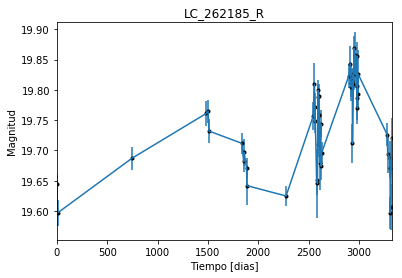

In [2]:
data = np.genfromtxt('LC_262185_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_262185_R')
plt.savefig("LC_262185_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

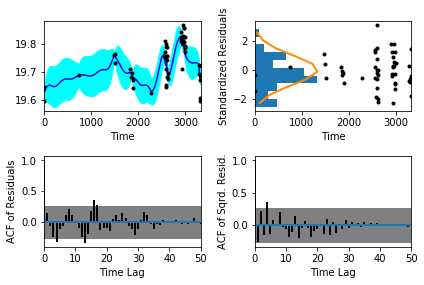

In [5]:
sample.assess_fit()

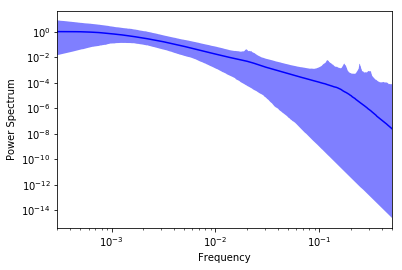

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

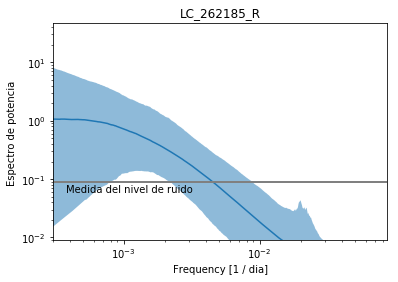

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_262185_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_262185_R')

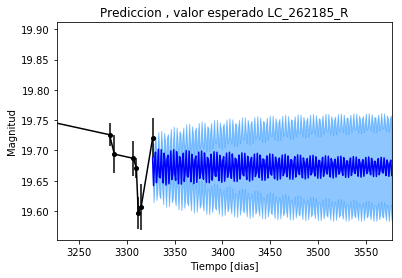

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_262185_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_262185_R')

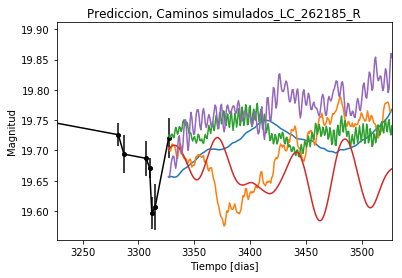

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_262185_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


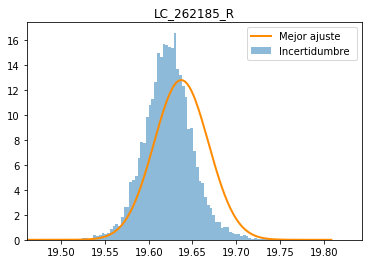

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_262185_R')
plt.savefig("Mejor_ajuste_LC_262185_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_262185_R')

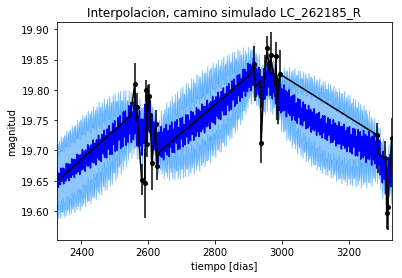

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_262185_R')

Text(0.5,1,'Interpolacion, camino simulado LC_262185_R')

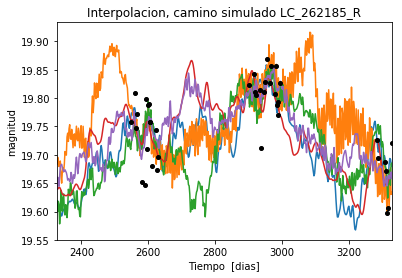

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_262185_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 651.273550328
Median: 0.0126115977222
Standard deviation: 0.189261992878
68% credibility interval: [ 0.00157533  0.16148373]
95% credibility interval: [  4.37420683e-04   7.47360207e-01]
99% credibility interval: [  3.31841439e-04   9.62448578e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 873.338904987
Median: 0.006491341868
Standard deviation: 0.116941284008
68% credibility interval: [ 0.00094058  0.05837303]
95% credibility interval: [  3.75674243e-04   4.13910230e-01]
99% credibility interval: [  3.18474574e-04   8.05871741e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 240.236643588
Median: 0.088249301247
Sta

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1100.64233595
Median: 101.706020108
Standard deviation: 2.07487372068
68% credibility interval: [  99.43040456  103.53236542]
95% credibility interval: [  96.89173287  104.94738577]
99% credibility interval: [  94.95681502  105.87794408]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 542.643380489
Median: 1.19531750297
Standard deviation: 2.4197356982
68% credibility interval: [ 0.16244726  4.48255165]
95% credibility interval: [ 0.02896981  8.41070659]
99% credibility interval: [  0.01465145  12.06962597]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 332.047855168
Median: 1.95910159862
Standard deviation: 11.3848120052
68% credibility interval: [  0.12855773  14.58865741]
95% credibility interval: [  1.51212775e-

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 375.238310371
Median: 2.30478547227e-26
Standard deviation: 3.98063598684e+121
68% credibility interval: [  1.36396611e-79   1.56346986e+66]
95% credibility interval: [  5.12274603e-141   1.62496955e+119]
99% credibility interval: [  1.11972015e-144   1.22375700e+122]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2037.17709775
Median: 19.7084256259
Standard deviation: 0.0306815815699
68% credibility interval: [ 19.68007615  19.73366679]
95% credibility interval: [ 19.63974093  19.76474989]
99% credibility interval: [ 19.60298598  19.79502015]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 295.40053567
Median: 0.146290411213
Standard deviation: 0.259224354603
68% credibility interval: [ 0.          0.54128573]
95% credibility interval: [ 0.          0.88684187]
99% credibility interval: [ 0.          0.98216422]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 295.40053567
Median: 0.146290411213
Standard deviation: 0.259224354603
68% credibility interval: [ 0.          0.54128573]
95% credibility interval: [ 0.          0.88684187]
99% credibility interval: [ 0.          0.98216422]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 861.64527412
Median: 0.0
Standard deviation: 0.000711429889005
68% credibi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1100.64233595
Median: 101.706020108
Standard deviation: 2.07487372068
68% credibility interval: [  99.43040456  103.53236542]
95% credibility interval: [  96.89173287  104.94738577]
99% credibility interval: [  94.95681502  105.87794408]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1770.89301908
Median: 0.00528241351953
Standard deviation: 0.00430751195254
68% credibility interval: [ 0.00329314  0.00946158]
95% credibility interval: [ 0.00219983  0.01674825]
99% credibility interval: [ 0.00174452  0.02536248]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 935.354497565
Median: 1.31800639345
Standard deviation: 0.265779236298
68% credibility interval: [ 1.06411813  1.62213945]
95% credibility interval: [ 0.85216477  1.87893821]
99% credibility interval: [ 0.75914295  1.97272735]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 395.460298148
Median: 0.00170548451011
Standard deviation: 0.244705326765
68% credibility interval: [  4.09127542e-69   7.35373585e-02]
95% credibility interval: [  1.19804390e-121   8.01177981e-001]
99% credibility interval: [  6.61710911e-125   1.62391372e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 651.273550328
Median: (-0.0792410055082-1.06713805682j)
Standard deviation: 2.01667118617
68% credibility interval: [-1.01463219-0.21182481j -0.00989809-4.89269231j]
95% credibility interval: [ -4.69580267e+00+0.j          -2.74839521e-03-4.31617292j]
99% credibility interval: [ -6.04724276e+00-2.07361248j  -2.08502126e-03-0.13155485j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 873.338904987
Median: (-0.0407863038489+1.59699062j)
Standard deviation: 1.78681826415
68% credibility interval: [-0.36676857+1.55499579j -0.00590985+0.9563438j ]
95% credibility interval: [ -2.60067467e+00+2.78376129j  -2.36043088e-03+0.12039103j]
99% credibility interval: [ -5.06344148e+00+3.33308069j  -2.00103476e-03+0.j        ]
Posteri